In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Ruta al archivo Excel
file_path = '../data/homicidios.xlsx'

# Cargar la hoja de datos de homicidios
homicidios = pd.read_excel(file_path, sheet_name='HECHOS')

# Cargar la hoja de datos de víctimas
victimas = pd.read_excel(file_path, sheet_name='VICTIMAS')

# Unir los DataFrames en función del ID del hecho
homicidios_con_victimas_df = pd.merge(homicidios, victimas, left_on='ID', right_on='ID_hecho', how='left')

# Mostrar las primeras filas del DataFrame combinado
homicidios_con_victimas_df


,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ID_hecho,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [3]:
homicidios_con_victimas_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'ID_hecho', 'FECHA_y',
       'AAAA_y', 'MM_y', 'DD_y', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [8]:
# Seleccionar las columnas relevantes para el análisis y construcción del dashboard
columnas_seleccionadas = ['ID','FECHA_x', 'AAAA_x', 'MM_x', 'HORA', 'pos x', 'pos y', 'COMUNA', 'VICTIMA_x', 'ACUSADO', 'N_VICTIMAS', 'ROL', 'SEXO', 'EDAD']
homicidios_df = homicidios_con_victimas_df[columnas_seleccionadas].copy()

# Convertir las columnas de posición (longitud y latitud) a valores numéricos
homicidios_df.loc[:, 'pos x'] = pd.to_numeric(homicidios_df['pos x'], errors='coerce')
homicidios_df.loc[:, 'pos y'] = pd.to_numeric(homicidios_df['pos y'], errors='coerce')

# Reemplazar los valores faltantes en 'pos x' y 'pos y' por 'SD' (sin datos) como estrategia para valores faltantes
homicidios_df.loc[:, 'pos x'] = homicidios_df['pos x'].fillna(0)
homicidios_df.loc[:, 'pos y'] = homicidios_df['pos y'].fillna(0)

# Renombrar las columnas con el nombre original
homicidios_df.rename(columns={'FECHA_x': 'FECHA'}, inplace=True)
homicidios_df.rename(columns={'VICTIMA_x': 'VICTIMA'}, inplace=True)
homicidios_df.rename(columns={'AAAA_x': 'AÑO'}, inplace=True)
homicidios_df.rename(columns={'MM_x': 'MES'}, inplace=True)

# Verificar los primeros registros del conjunto de datos actualizado
homicidios_df


          ID      FECHA      HORA      pos x      pos y  COMUNA VICTIMA  \
0  2016-0001 2016-01-01  04:00:00  -58.47534  -34.68757       8    MOTO   
1  2016-0002 2016-01-02  01:15:00 -58.508775 -34.669777       9    AUTO   
2  2016-0003 2016-01-03  07:00:00 -58.390403 -34.631894       1    MOTO   
3  2016-0004 2016-01-10  00:00:00 -58.465039  -34.68093       8    MOTO   
4  2016-0005 2016-01-21  05:20:00 -58.387183 -34.622466       1    MOTO   

     ACUSADO  N_VICTIMAS        ROL       SEXO EDAD  
0       AUTO           1  CONDUCTOR  MASCULINO   19  
1  PASAJEROS           1  CONDUCTOR  MASCULINO   70  
2       AUTO           1  CONDUCTOR  MASCULINO   30  
3         SD           1  CONDUCTOR  MASCULINO   18  
4  PASAJEROS           1  CONDUCTOR  MASCULINO   29  


### Observaciones
* Seleccionamos aquellas columnas que nos permitirán obtener información relevante para el dashboard y eliminamos las columnas que pueden tener información redundante que otras columnas ya nos entregan.

* También se ha hecho conversión a los datos que necesitamos sean númericos y los valores faltantes no se han eliminado de los registros porque todos los siniestros con consecuencias mortales son importantes para el análisis.

* En el caso de no tener valores para la ubicación se reemplazó por el valor SD (Sin Dato) que nos indica que para ese registro, en particular, no tenemos esa información.

In [9]:
# Verificación de valores faltantes
valores_faltantes = homicidios_df.isna().sum()
valores_faltantes

ID            0
FECHA         0
HORA          0
pos x         0
pos y         0
COMUNA        0
VICTIMA       0
ACUSADO       0
N_VICTIMAS    0
ROL           0
SEXO          0
EDAD          0
dtype: int64

* No tenemos valores faltantes adicionales

In [10]:
# Verificación de registros duplicados
registros_duplicados = homicidios_df.duplicated().sum()
registros_duplicados

0

* No tenemos registros duplicados

## Análisis numérico

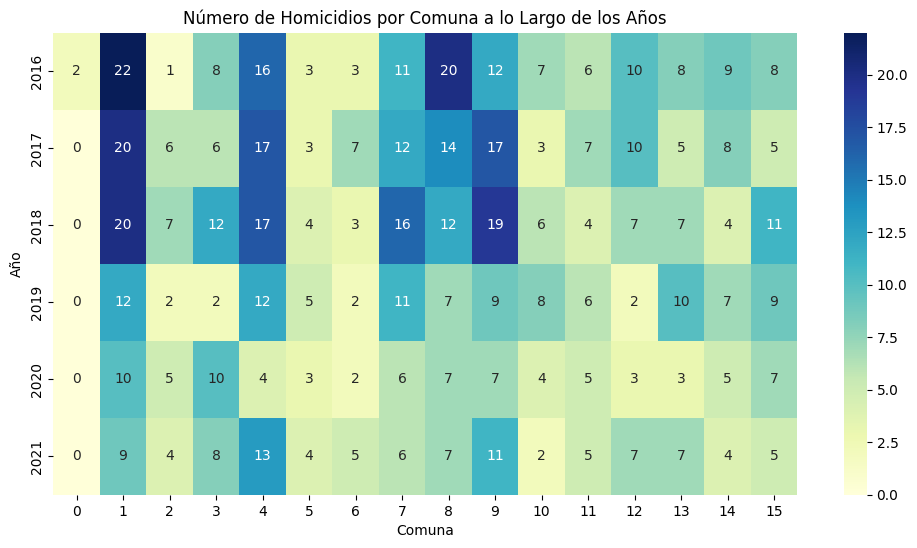

In [11]:
# Análisis de Tendencias y Patrones por Comuna

# Calcular estadísticas clave del número de víctimas por comuna
estadisticas_victimas_por_comuna = homicidios_df.groupby('COMUNA')['N_VICTIMAS'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by='count', ascending=False)

# Comparación temporal del número de homicidios por comuna a lo largo de los años
homicidios_temporales_comuna = homicidios_df.groupby(['AÑO', 'COMUNA']).size().unstack(fill_value=0)

# Visualización: Número de Homicidios por Comuna a lo largo de los Años
plt.figure(figsize=(12, 6))
sns.heatmap(homicidios_temporales_comuna, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Número de Homicidios por Comuna a lo Largo de los Años')
plt.xlabel('Comuna')
plt.ylabel('Año')
plt.show()

### Observaciones

* Algunas comunas tienen un número significativamente mayor de homicidios como la comuna 1, 3, 4 y 9 en comparación con otras, en el último año.

* Se aprecia que en la comuna 1, 7, 8, 10 y 15 los homicidios han disminuido notablemente. Lo que valdría la pena revisar que políticas públicas se aplicaron adecuadamente allí y que acciones posibilitaron su disminución.

* Es importante revisar el estado la infraestructura en esas comunas, condiciones de seguridad y factores socioeconómicos que puedan afectar el indicador.

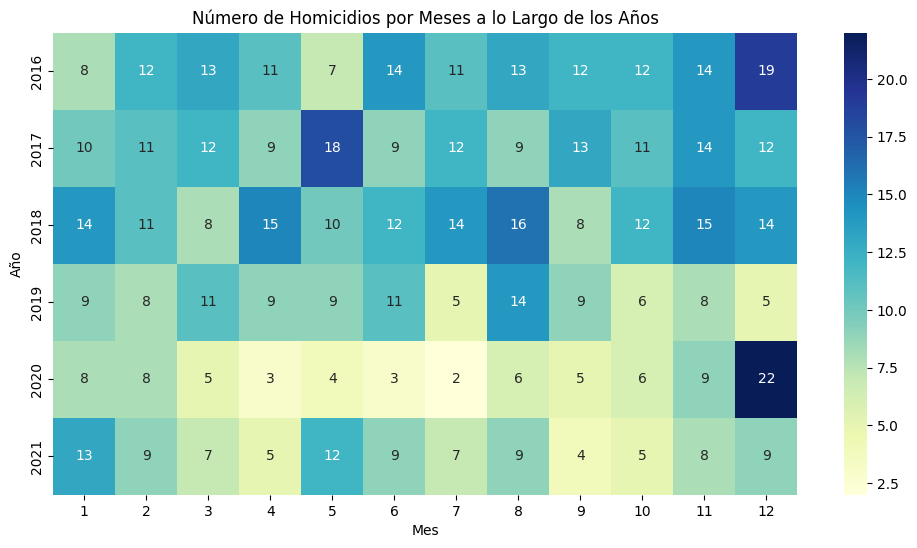

In [12]:
# Análisis de Tendencias y Patrones por Meses

# Calcular estadísticas clave del número de víctimas por comuna
estadisticas_victimas_por_mes = homicidios_df.groupby('MES')['N_VICTIMAS'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by='count', ascending=False)

# Comparación temporal del número de homicidios por comuna a lo largo de los años
homicidios_temporales_mes = homicidios_df.groupby(['AÑO', 'MES']).size().unstack(fill_value=0)


# Visualización: Número de Homicidios por Comuna a lo largo de los Años
plt.figure(figsize=(12, 6))
sns.heatmap(homicidios_temporales_mes, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Número de Homicidios por Meses a lo Largo de los Años')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

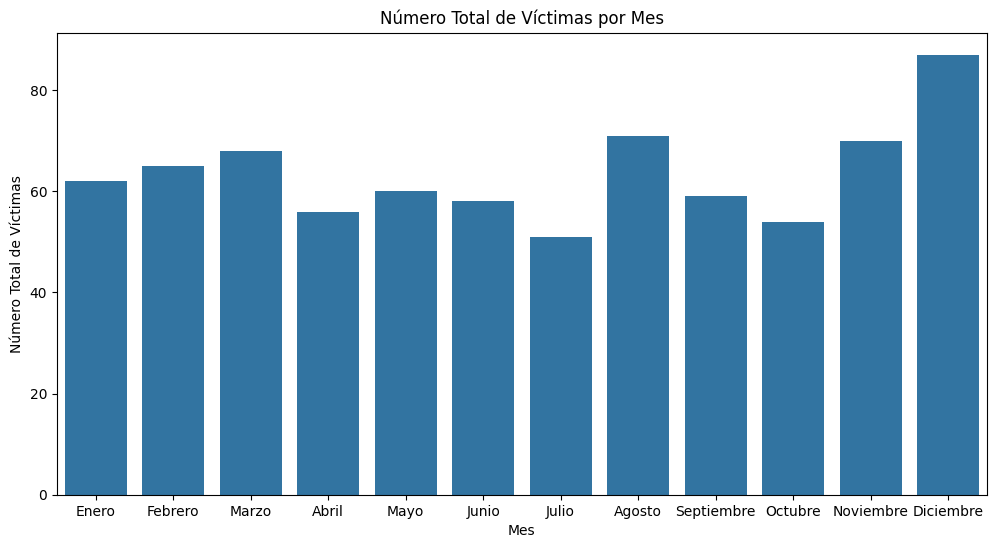

In [13]:
# Agrupar los datos por mes y sumar el número de víctimas
victimas_por_mes = homicidios_df.groupby('MES')['N_VICTIMAS'].sum()

# Visualización de víctimas por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=victimas_por_mes.index, y=victimas_por_mes.values)
plt.title('Número Total de Víctimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Total de Víctimas')
plt.xticks(range(0, 12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

### Observaciones

* Dados los gráficos representados, hay una concentración alta en los meses de diciembre y de agosto. Lo que valdría la pena revisar qué eventos se realizan en esas fechas y que posibles fiestas temporales son los que están relaciones directamente con los accidentes mortales.

In [14]:
# Guardar el DataFrame 'homicidios_df' en un archivo CSV
homicidios_df.to_csv('../data/homicidios.csv', index=False)

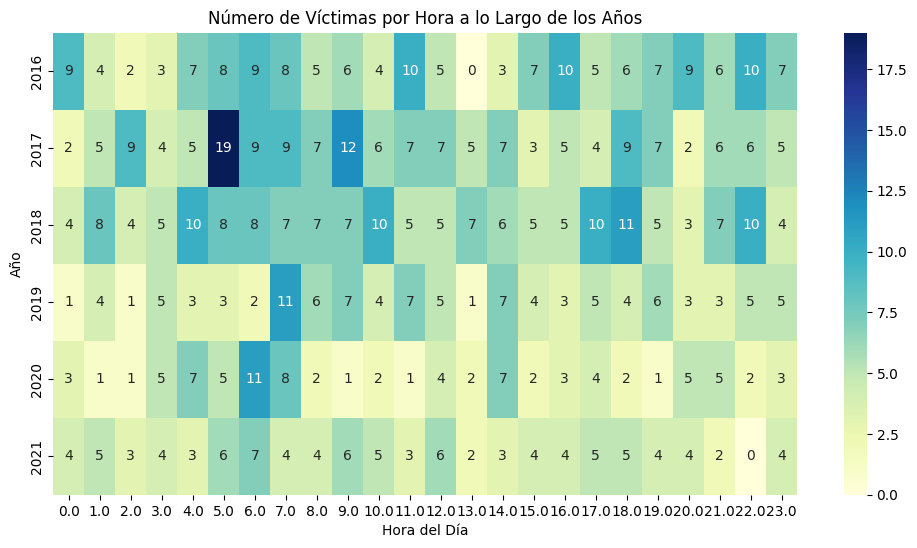

In [15]:
# Convertir la columna 'HORA' a un formato de hora y extraer la hora del día
homicidios_df['HORA'] = pd.to_datetime(homicidios_df['HORA'], format='%H:%M:%S', errors='coerce').dt.hour

# Filtrar los registros donde la hora es nula (debido a valores como 'SD')
homicidios_df = homicidios_df.dropna(subset=['HORA'])

# Agrupar los datos por año y hora para sumar el número de víctimas
homicidios_por_hora_ano = homicidios_df.groupby(['AÑO', 'HORA'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Visualización de número de víctimas por hora a lo largo de los años
plt.figure(figsize=(12, 6))
sns.heatmap(homicidios_por_hora_ano, cmap="YlGnBu", annot=True)
plt.title('Número de Víctimas por Hora a lo Largo de los Años')
plt.xlabel('Hora del Día')
plt.ylabel('Año')
plt.show()

### Observaciones

* Se observa como es de suponerse que las horas donde más se presentan accidentes mortales es durante algunas horas pico. Esto corresponde a las horas que comienza la jornada laboral y medio día. 

* La tendencia de homicidios en la tarde o al finalizar la jornada ha disminuido considerablemente a lo largo de los años. Importante revisar las razones de esto, es posible que los accidentes materiales son los que se hayan incrementado en esa hora al tener mayor cantidad de carros y menor velocidad.

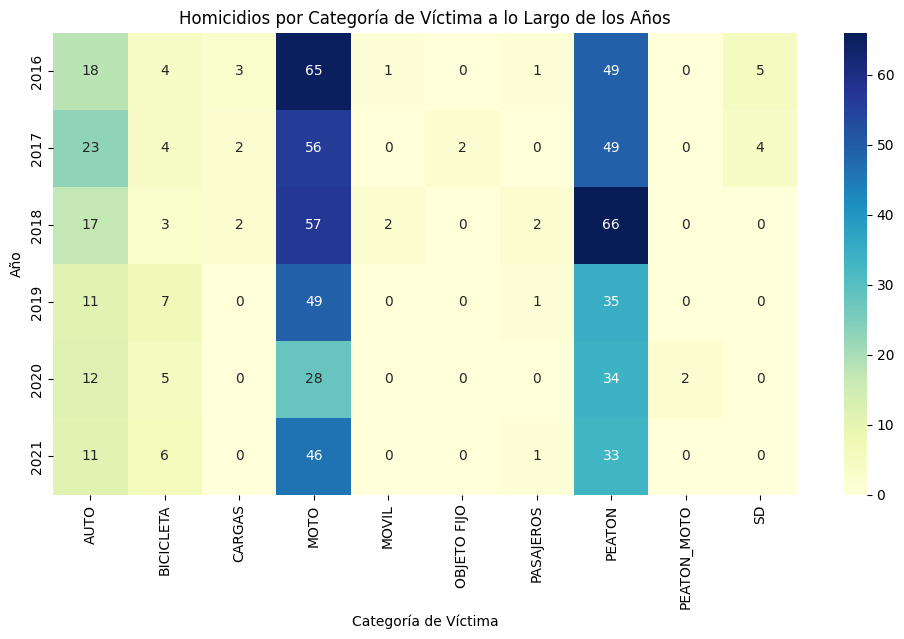

In [16]:
# Análisis de las categorías de víctimas

# Agrupar los datos por año y categoría de víctima, y contar los casos
victimas_por_año = homicidios_df.groupby(['AÑO', 'VICTIMA']).size().unstack(fill_value=0)

# Visualización de víctimas por año
plt.figure(figsize=(12, 6))
sns.heatmap(victimas_por_año, cmap="YlGnBu", annot=True)
plt.title('Homicidios por Categoría de Víctima a lo Largo de los Años')
plt.xlabel('Categoría de Víctima')
plt.ylabel('Año')
plt.show()


### Observaciones

* Se observa que las principales victimas de los homicidios en siniestros viales son las motos y los peatones, con una diferencia bastante grande con respecto a las otras categorías. Es decir que las campañas o acciones que estuvieran diseñadas para este público tendrían gran impacto.

* Las víctimas de vehículo han disminuido considerablemente y las de bicicleta vienen en aumento, debido principalmente a su uso se puede asumir.

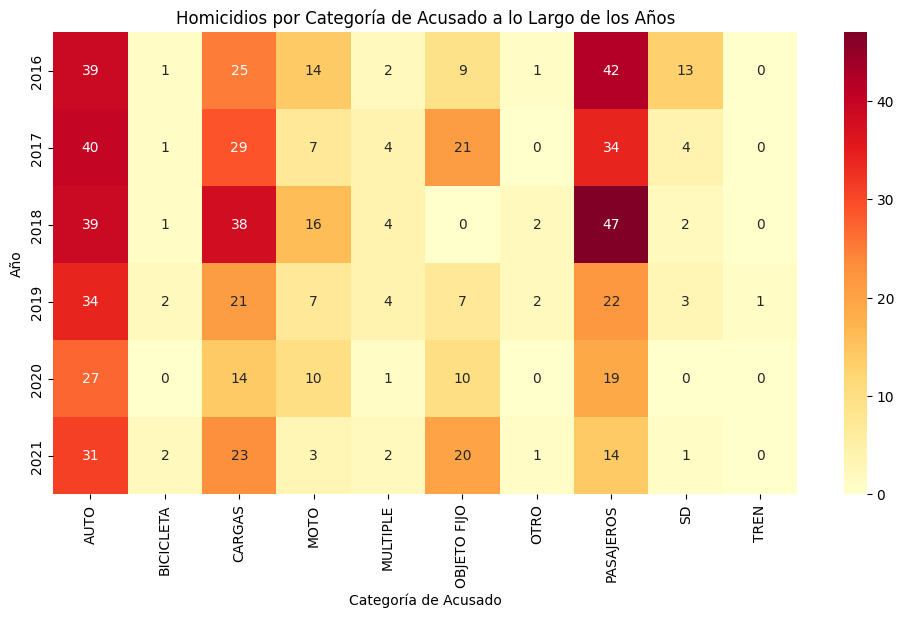

In [17]:
# Análisis de las categorías de acusados

# Agrupar los datos por año y categoría de acusado, y contar los casos
acusados_por_año = homicidios_df.groupby(['AÑO', 'ACUSADO']).size().unstack(fill_value=0)

# Visualización de acusados por año
plt.figure(figsize=(12, 6))
sns.heatmap(acusados_por_año, cmap="YlOrRd", annot=True)
plt.title('Homicidios por Categoría de Acusado a lo Largo de los Años')
plt.xlabel('Categoría de Acusado')
plt.ylabel('Año')
plt.show()

### Observaciones

* Los autos continuan a lo largo del tiempo como los principales acusados de los homicidios en siniestros viales en CABA. Siendo el actor más importante a impactar y a desarrollar políticas para su manejo. 

* Los objetos fijos tienen un incremento notable en el último año, se verificará si son en diferentes comunas posteriormente.

* Los pasajeros como acusados disminuyen notablemente a lo largo del tiempo, es posible que por campañas de información ciudadanas y mejor señalización.

In [18]:
# Realizaremos una consulta por comuna par adeterminar si los objetos fijos están concentrados en una localidad
# Filtrar los datos para el último año disponible y para la categoría de acusado "OBJETO FIJO"
ultimo_año = homicidios_df['AÑO'].max()
datos_ultimo_año_objeto_fijo = homicidios_df[(homicidios_df['Año'] == ultimo_año) & 
                                                 (homicidios_df['ACUSADO'] == 'OBJETO FIJO')]

# Conteo de casos de "OBJETO FIJO" como acusado por comuna
conteo_objeto_fijo_comuna = datos_ultimo_año_objeto_fijo['COMUNA'].value_counts()

conteo_objeto_fijo_comuna


COMUNA
7     2
15    2
8     2
12    2
3     2
11    2
9     2
6     1
10    1
4     1
5     1
2     1
1     1
Name: count, dtype: int64